### Fetched Global Warming data from apis and analysed it 

In [2]:
URL_temp = 'https://global-warming.org/api/temperature-api'
URL_co2 = 'https://global-warming.org/api/co2-api'
URL_ice = 'https://global-warming.org/api/arctic-api'

In [3]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt

In [4]:
data_co2 = requests.get(URL_co2)
data_temp = requests.get(URL_temp)

In [5]:
co2 = data_co2.json()
list_co2 =co2.get("co2")
df_co2 = pd.DataFrame(list_co2)
df_co2 = df_co2.apply(pd.to_numeric)

In [6]:
df_co2

,year,month,day,cycle,trend
0,2011,1,1,391.25,389.76
1,2011,1,2,391.29,389.77
2,2011,1,3,391.32,389.77
3,2011,1,4,391.36,389.78
4,2011,1,5,391.39,389.79
...,...,...,...,...,...
3720,2021,3,9,416.11,414.35
3721,2021,3,10,416.12,414.36
3722,2021,3,11,416.14,414.36
3723,2021,3,12,416.15,414.37


In [7]:
data_cycle= df_co2.groupby('year', as_index=False)['cycle'].mean()

data_trend =df_co2.groupby('year', as_index=False)['trend'].mean()

In [8]:
data_cycle

,year,cycle
0,2011,390.785452
1,2012,392.762022
2,2013,395.570795
3,2014,397.578356
4,2015,399.796767
5,2016,403.011311
6,2017,405.495288
7,2018,407.716932
8,2019,410.271726
9,2020,412.788443


Text(0, 0.5, 'parts per million')

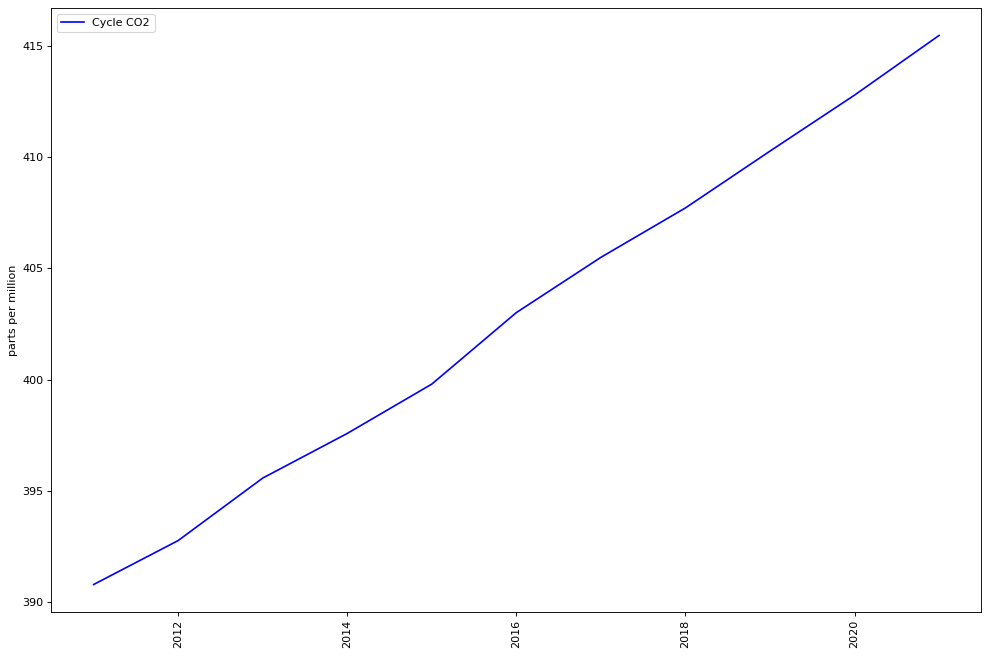

In [9]:
plt.figure(figsize=(15,10), dpi= 80)
plt.xticks(rotation = 90)
plt.plot(data_cycle['year'],data_cycle['cycle'],color = "blue",label = 'Cycle CO2')
plt.legend(loc='upper left')
plt.ylabel('parts per million')

Text(0, 0.5, 'parts per million')

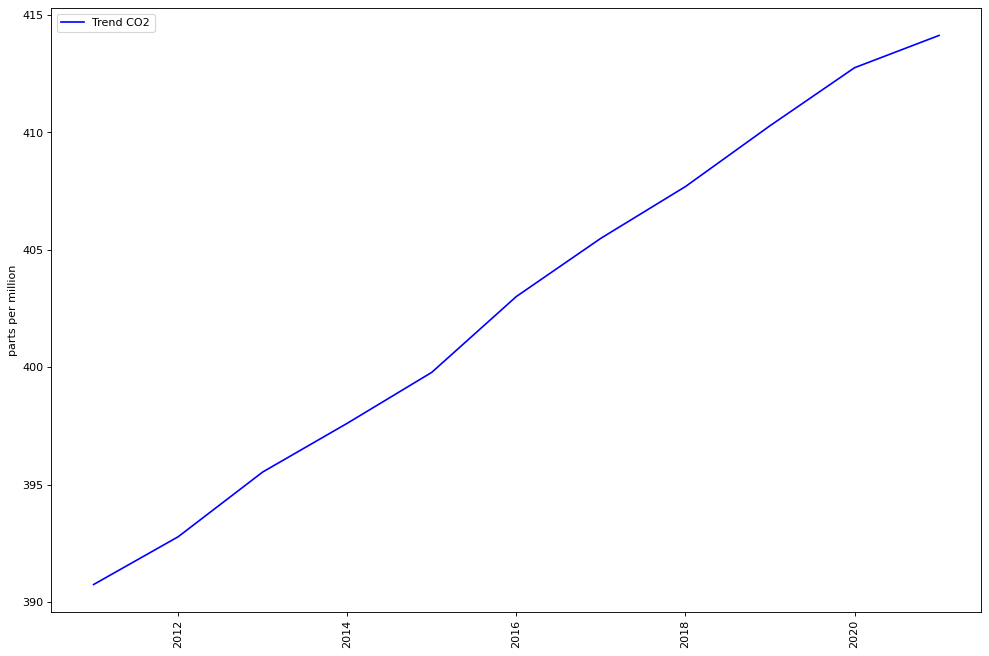

In [17]:
plt.figure(figsize=(15,10), dpi= 80)
plt.xticks(rotation = 90)
plt.plot(data_trend['year'],data_trend['trend'],color = "blue",label = 'Trend CO2')
plt.legend(loc='upper left')
plt.ylabel('parts per million')

In [11]:
temp = data_temp.json()
list_temp =temp.get("result")

df_temp = pd.DataFrame(list_temp)
df_temp= df_temp.apply(pd.to_numeric)

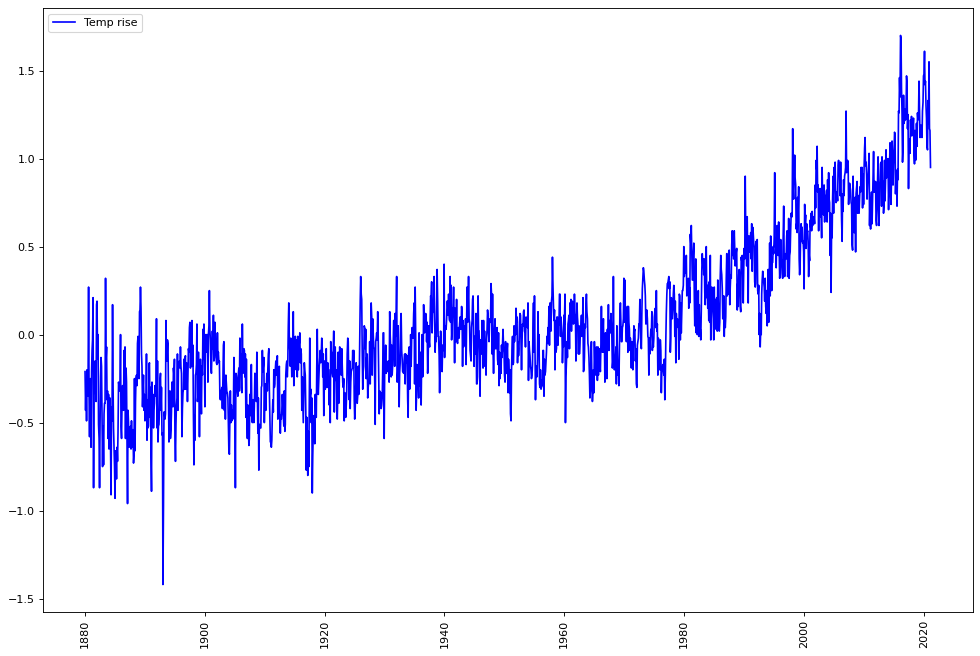

In [12]:
plt.figure(figsize=(15,10), dpi= 80)
plt.xticks(rotation = 90)
plt.plot(df_temp['time'],df_temp['station'],color = "blue",label = 'Temp rise')
plt.legend(loc='upper left')

In [14]:
data_ice = requests.get(URL_ice)

In [15]:
ice =data_ice.json()
list_ice = ice.get("result")
df_ice = pd.DataFrame(list_ice)
df_ice

,year,extent,area
0,1979,7.05,4.58
1,1980,7.67,4.87
2,1981,7.14,4.44
3,1982,7.30,4.43
4,1983,7.39,4.70
5,1984,6.81,4.11
6,1985,6.70,4.23
7,1986,7.41,4.72
8,1987,7.28,5.64
9,1988,7.37,5.36


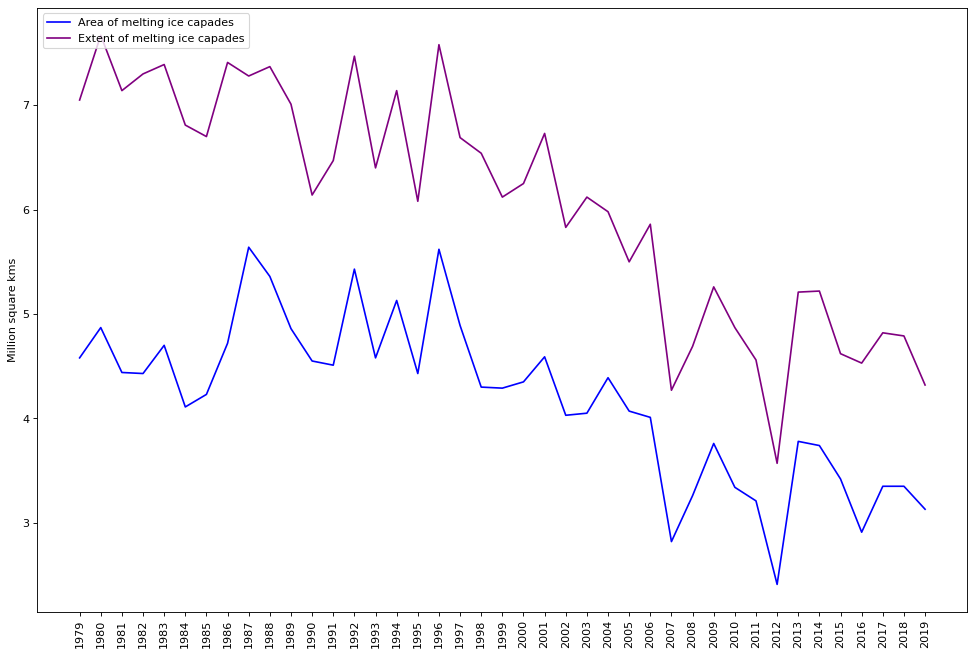

In [16]:
plt.figure(figsize=(15,10), dpi= 80)
plt.xticks(rotation = 90)
plt.plot(df_ice['year'],df_ice['area'],color = "blue",label = 'Area of melting ice capades')
plt.plot(df_ice['year'],df_ice['extent'],color = "purple",label = 'Extent of melting ice capades')
plt.ylabel('Million square kms')
plt.legend(loc='upper left')